In [5]:
import numpy as np 
from matplotlib import pyplot as plt 
import pandas as pd
np.random.seed(903378735)

In [6]:
data =  pd.read_csv('all_data_compiled_v2.csv')
print(data)

      index_compiled  index  class   B_B_FLUX_AP  B_B_FLUX_AP_HI  \
0                  0    238    0.0  5.914972e-06    6.758748e-06   
1                  1    775    0.0  1.658041e-07    3.296501e-07   
2                  2    345    1.0  3.105360e-05    3.775322e-05   
3                  3     19    0.0  0.000000e+00    2.872928e-07   
4                  4     89    0.0  2.255083e-06    2.596685e-06   
...              ...    ...    ...           ...             ...   
1369            1369    110    0.0  9.741220e-07    1.191529e-06   
1370            1370     92    1.0  1.273567e-06    1.423573e-06   
1371            1371    424    0.0  3.530499e-06    4.125230e-06   
1372            1372    456    0.0  8.872458e-07    1.314917e-06   
1373            1373     85    0.0  2.255083e-06    2.596685e-06   

      B_B_FLUX_AP_LO  B_M_FLUX_AP  B_M_FLUX_AP_HI  B_M_FLUX_AP_LO  \
0       5.037037e-06     0.000025        0.000033        0.000017   
1       0.000000e+00     0.000000        0.00

In [7]:
print(data.shape)
x = data.drop(['index_compiled', 'index', 'class'],axis=1)
print(x.shape)
y = data['class']
y.shape

(1374, 427)
(1374, 424)


(1374,)

In [8]:
def split_data(x,y,s):   
    x =  x.to_numpy()
    y =  y.to_numpy()
    split = s
    split_no = int(split*len(y))
    x_train = x[:split_no, :]
    y_train = y[:split_no]
    x_test = x[split_no:, :]
    y_test = y[split_no:]
    return ((x_train,y_train) , (x_test ,y_test))

(x_train,y_train),(x_test,y_test) = split_data(x, y, 0.7)
_ , (x_test_copy , y_test_copy) = split_data(x, y, 0.7)
print(x_train.shape ,y_train.shape)
print(x_test.shape ,y_test.shape)

(x_test_copy , y_test_copy) , (a,b) = split_data(x, y, 0.7)
np.shape(x_test_copy)

(961, 424) (961,)
(413, 424) (413,)


(961, 424)

# Neural Netork starts here

In [9]:
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

In [10]:
one_hot_y_train =  to_categorical(y_train)
one_hot_y_test =  to_categorical(y_test)

In [18]:
np.random.seed(903378735)
def model_gen(shape , input_len):

    inputs =  keras.Input(shape=(input_len,))
    dense =  layers.Dense(64, activation='relu')
    x = dense(inputs)
    x =  layers.BatchNormalization(axis=-1)(x)
    #x = layers.Dropout(0.3)(x)
    for s in shape:
        x = layers.Dense(s, activation='relu')(x)
    x =  layers.BatchNormalization(axis=-1)(x)
    outputs = layers.Dense(2 , activation='sigmoid')(x)
    model = keras.Model(inputs=inputs , outputs=outputs , name='trial_model')
    model.compile(
        loss = "categorical_crossentropy",
        optimizer = keras.optimizers.SGD(),
        metrics = ["accuracy"],
    )
    return model
model = model_gen([64,64,32,32] , x_train.shape[1])
history = model.fit(x_train, one_hot_y_train, batch_size=64, epochs=80, validation_split=0.2)


Epoch 1/80
12/12 [==============================] - 1s 30ms/step - loss: 0.7796 - accuracy: 0.6562 - val_loss: 0.6496 - val_accuracy: 0.6891
Epoch 2/80
12/12 [==============================] - 0s 5ms/step - loss: 0.3553 - accuracy: 0.8646 - val_loss: 0.6294 - val_accuracy: 0.6891
Epoch 3/80
12/12 [==============================] - 0s 5ms/step - loss: 0.2818 - accuracy: 0.9115 - val_loss: 0.6169 - val_accuracy: 0.6891
Epoch 4/80
12/12 [==============================] - 0s 5ms/step - loss: 0.2369 - accuracy: 0.9180 - val_loss: 0.6065 - val_accuracy: 0.6891
Epoch 5/80
12/12 [==============================] - 0s 6ms/step - loss: 0.2142 - accuracy: 0.9349 - val_loss: 0.5954 - val_accuracy: 0.6891
Epoch 6/80
12/12 [==============================] - 0s 6ms/step - loss: 0.1660 - accuracy: 0.9492 - val_loss: 0.5852 - val_accuracy: 0.6995
Epoch 7/80
12/12 [==============================] - 0s 5ms/step - loss: 0.1621 - accuracy: 0.9466 - val_loss: 0.5740 - val_accuracy: 0.7098
Epoch 8/80
12/12 [=

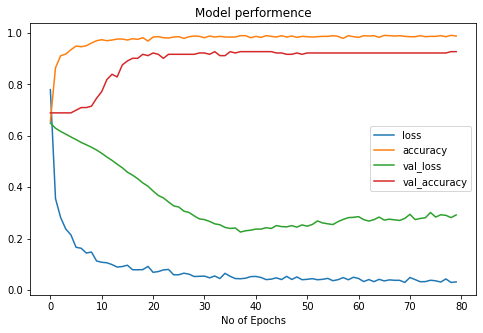

In [19]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.xlabel("No of Epochs")
plt.title('Model performence')
plt.savefig('plots/bn_model_level_0_rows.png')
plt.show()

In [96]:
model.summary()

Model: "trial_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 424)]             0         
_________________________________________________________________
dense_30 (Dense)             (None, 64)                27200     
_________________________________________________________________
batch_normalization_8 (Batch (None, 64)                256       
_________________________________________________________________
dense_31 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_32 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_33 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_34 (Dense)             (None, 8)                 

In [22]:
def acc_score(model , y_test , x_test):
    print('----inside acc function')
    print(np.shape(x_test))
    y_pred = model.predict(x_test)
    print(np.shape(y_pred))
    print(np.shape(y_test))
    y_pred = [np.argmax(r) for r in y_pred]
    y_test = [np.argmax(r) for r in y_test]
    correct = 0
    total =  len(y_test)
    for y1,y2 in zip(y_pred,y_test):
        if(int(y1)==int(y2)):
            correct+=1
        else:
            continue
    print('correct prediction :' , correct)
    print('total prediction :' , total)
    print('Score {:.2F}'.format(correct/total*100))
    return(correct/total*100)
print('training data prediction')
acc_score(model, one_hot_y_train, x_train)
print('----------------------------------')
print('test data prediciton')
acc_score(model, one_hot_y_test, x_test)

training data prediction
----inside acc function
(961, 424)
(961, 2)
(961, 2)
correct prediction : 940
total prediction : 961
Score 97.81
----------------------------------
test data prediciton
----inside acc function
(413, 424)
(413, 2)
(413, 2)
correct prediction : 395
total prediction : 413
Score 95.64


95.64164648910412

## Feature reshuffling

In [23]:
'''
(x_test_copy , y_test_copy) , (a,b) = split_data(x, y, 0.7)
print(np.shape(x_test_copy))
oh_y =  to_categorical(y_test_copy)
s = acc_score(model, oh_y, x_test_copy)
'''
acc_list = []

for index in range(413):
    (x_test_copy , y_test_copy) , (a,b) = split_data(x, y, 0.7)
    np.shape(x_test_copy)
    oh_y =  to_categorical(y_test_copy)
    acc_score(model, oh_y, x_test_copy)
    temp = x_test_copy[:,index]
    print(temp[:10])
    x_test_copy[:,index] = np.zeros(np.shape(x_test_copy[:,index]))
    temp = x_test_copy[:,index]
    s = acc_score(model, oh_y, x_test_copy)
    acc_list.append(s)
    print(temp[:10])

----inside acc function
(961, 424)
(961, 2)
(961, 2)
correct prediction : 940
total prediction : 961
Score 97.81
[5.91497227e-06 1.65804067e-07 3.10536044e-05 0.00000000e+00
 2.25508318e-06 9.77818854e-06 7.30129390e-07 0.00000000e+00
 4.82439926e-07 2.56931608e-05]
----inside acc function
(961, 424)
(961, 2)
(961, 2)
correct prediction : 940
total prediction : 961
Score 97.81
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
----inside acc function
(961, 424)
(961, 2)
(961, 2)
correct prediction : 940
total prediction : 961
Score 97.81
[6.75874770e-06 3.29650092e-07 3.77532228e-05 2.87292818e-07
 2.59668508e-06 1.06445672e-05 1.04235727e-06 1.09023941e-06
 7.79005525e-07 2.63351750e-05]
----inside acc function
(961, 424)
(961, 2)
(961, 2)
correct prediction : 940
total prediction : 961
Score 97.81
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
----inside acc function
(961, 424)
(961, 2)
(961, 2)
correct prediction : 940
total prediction : 961
Score 97.81
[5.03703704e-06 0.00000000e+00 2.38888889e-05 0.00000000e+00
 1

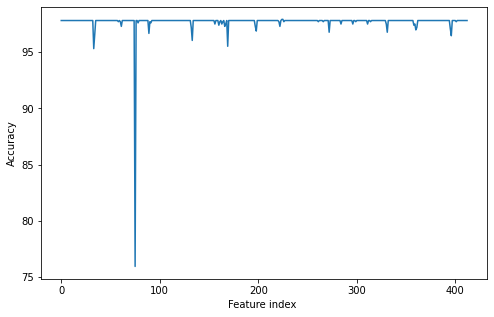

75
B_B_KP_INTRA_PROB
B_B_KS_INTRA_PROB
B_BII
B_ERROR_ELLIPSE_ANGLE
B_H_KP_INTRA_PROB
B_H_KS_INTRA_PROB
B_HARDNESS_RATIO_MS_LO
B_M_KS_INTRA_PROB
B_S_KS_INTRA_PROB
B_U_KS_INTRA_PROB
B_VAR_INTER_HARD_PROB_HS
B_VAR_INTER_HARD_PROB_MS
B_W_KP_INTRA_PROB
B_W_KS_INTRA_PROB
------------------------------------


In [27]:
plt.figure(figsize=(8,5))
plt.plot(acc_list)
plt.xlabel('Feature index ')
plt.ylabel('Accuracy')
plt.savefig('plots/acc.png')
plt.show()
print(np.argmin(acc_list))
curr_rows =  pd.read_csv('rows/current_rows.csv' , names=['index','name'] , delimiter=' ')
acc_max = np.average(acc_list)
for i in range(len(acc_list)):
    if(acc_list[i]<0.995*acc_max):
        print(curr_rows.iloc[i]['name'])
print('------------------------------------')
for i in range(len(acc_list)):
    if(acc_list[i]>1.01*acc_max):
        print(curr_rows.iloc[i]['name'])
#print(curr_rows.iloc[66])

In [100]:
_ , (x_test_copy , y_test_copy) = split_data(x, y, 0.7)
index = 100
temp = x_test_copy[:,index]
print(temp[:10])
x_test_copy[:,index] =  np.zeros(temp.shape)
print(x_test_copy[:,index][:10])
x_test_copy[:,index] = temp 
print(x_test_copy[:,index][:10])

[0.00000000e+00 5.43967280e-04 0.00000000e+00 2.71983640e-06
 0.00000000e+00 0.00000000e+00 1.20654397e-03 1.08179959e-05
 0.00000000e+00 0.00000000e+00]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


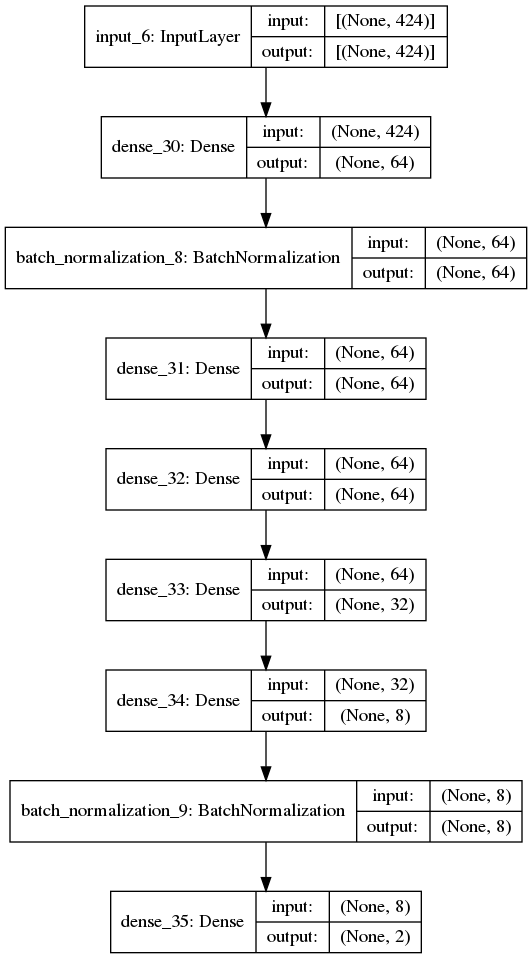

In [101]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='plots/model_plot.png', show_shapes=True, show_layer_names=True)

In [102]:
curr_rows =  pd.read_csv('rows/current_rows.csv' )
print(curr_rows.iloc[66])

0 B_B_FLUX_AP    67 B_BB_KT_HI
Name: 66, dtype: object
